## Predicting Nasdaq 100 closing prices using the top 10 companies from its index with Linear Regression, Random Forest Aggressor and Deep Neural Network models

In [23]:
#Importing Libraries

import pandas_datareader as web
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from pathlib import Path
from sklearn.linear_model import LinearRegression
import hvplot.pandas
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
#Extracting data

df = pd.read_csv(
    Path("nsdq_top_10.csv"),
    index_col="Date",
    infer_datetime_format=True,
    parse_dates=True,
)
df.head()
df = df.rename(columns={'^NDX' : 'NASDAQ_100'})

#Setting our features and target variables/

X = df.iloc[:,0:9]
X = X.values.reshape(-1,9)

y = df["NASDAQ_100"]
X

df.head()


,AAPL,ADBE,AMZN,FB,GOOG,GOOGL,MSFT,NFLX,NVDA,TSLA,NASDAQ_100
Date,,,,,,,,,,,
2020-01-02,75.087502,334.429993,1898.010010,209.779999,1367.369995,1368.680054,160.619995,329.809998,59.977501,86.052002,8872.219727
2020-01-03,74.357498,331.809998,1874.969971,208.669998,1360.660034,1361.520020,158.619995,325.899994,59.017502,88.601997,8793.900391
2020-01-06,74.949997,333.709991,1902.880005,212.600006,1394.209961,1397.810059,159.029999,335.829987,59.264999,90.307999,8848.519531
2020-01-07,74.597504,333.390015,1906.859985,213.059998,1393.339966,1395.109985,157.580002,330.750000,59.982498,93.811996,8846.450195
2020-01-08,75.797501,337.869995,1891.969971,215.220001,1404.319946,1405.040039,160.089996,339.260010,60.095001,98.428001,8912.370117


# Model Prediction with Linear Regression

In [3]:
#Splitting data into train test.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (363, 9)
y_train (363,)
x_test (121, 9)
y_test (121,)


In [4]:
#Creating Linear Regression model

model_1 = LinearRegression()

model_1.fit(X_train,y_train)

LinearRegression()

In [5]:
#Making prediction
predict = model_1.predict(X_test)
predict 

array([10653.68659302, 13575.93300471, 10692.74452412, 12946.57436326,
       16036.07910991, 11606.29954352, 13036.97374715, 13174.20875402,
       16428.53610651, 13375.48982   , 11977.41641975, 10436.51388801,
        8767.24564487,  8727.90486975, 13898.05438346,  9445.55075255,
       12206.45818746, 10600.31668555, 12248.79352417, 12018.76624471,
       10957.83060017, 15552.24515493, 15223.92280416, 15076.10492663,
       11775.27027795, 13333.63695137, 11515.16716968,  9373.44982585,
       11470.95586382,  8131.35608113,  9877.38961998, 11618.41141393,
        9623.92766488, 14764.55191625, 12365.11144898, 11235.93600465,
       15035.27671705, 16043.80152223, 13884.0505471 , 12625.67550518,
       15252.02613222, 13621.64119911, 13288.64722242, 13646.87266191,
       13381.69495223, 15023.99333807, 11741.73377918, 13722.4796758 ,
       14170.16777556, 13995.85462977,  9034.57739745, 12041.10897821,
       12887.1642874 , 13572.5481894 ,  8958.6900844 , 13831.02635717,
      

In [6]:
# Recovering the original prices instead of the scaled version
predicted_prices = predict
real_prices = y_test

ndx = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 

ndx.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [7]:
 #calculation of the mean absolute error
mse = mean_squared_error(y_test, predict)
mse

31848.812134251246

In [8]:
 #calculation of the mean absolute error
mae_1 = mean_absolute_error(y_test, predict)
mae_1

143.75174867103522

## Model Prediction using Random Forest Regressor

In [9]:
#Setting out features and target variables

X1 = df.iloc[:,0:9]
X1 = X1.values.reshape(-1,9)

y1 = df["NASDAQ_100"]

X1


array([[  75.08750153,  334.42999268, 1898.01000977, ...,  160.61999512,
         329.80999756,   59.97750092],
       [  74.35749817,  331.80999756, 1874.9699707 , ...,  158.61999512,
         325.8999939 ,   59.01750183],
       [  74.94999695,  333.70999146, 1902.88000488, ...,  159.02999878,
         335.82998657,   59.26499939],
       ...,
       [ 160.24000549,  687.48999023, 3561.57006836, ...,  336.63000488,
         663.84002686,  333.76000977],
       [ 165.30000305,  669.84997559, 3507.07006836, ...,  330.58999634,
         641.90002441,  326.76000977],
       [ 164.77000427,  657.40997314, 3443.7199707 , ...,  330.07998657,
         617.77001953,  314.3500061 ]])

In [10]:
#Splitting data into train test split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=78)
print("x1_train", X1_train.shape)
print("y1_train", y1_train.shape)
print("x1_test", X1_test.shape)
print("y1_test", y1_test.shape)

x1_train (363, 9)
y1_train (363,)
x1_test (121, 9)
y1_test (121,)


In [11]:
#Building Random Forest Aggressor 

model_2 = RandomForestRegressor(n_estimators=100, random_state=78)

model_2.fit(X_train,y_train)

predictions_2 = model_2.predict(X_test)
predictions_2

array([10675.6612207 , 13670.22287109, 10644.64728516, 12765.96262695,
       16273.31817383, 11382.67583008, 13376.79030273, 13202.28908203,
       16341.85112305, 13355.74494141, 12018.46027344, 10529.69852539,
        8640.89447266,  8708.37074219, 14004.0272168 ,  9617.53101562,
       12596.05859375, 10669.1877832 , 12693.0075293 , 11859.71467773,
       11157.49043945, 15340.43974609, 14822.3515918 , 15036.34158203,
       11769.06244141, 13377.20644531, 11524.03470703,  9278.97931641,
       11483.31313477,  7887.56203613,  9944.17577148, 11429.8846875 ,
        9708.64881836, 14495.01166992, 12528.43509766, 11252.21604492,
       14976.20107422, 16259.19838867, 13949.19304687, 12892.99914062,
       15121.59719727, 13600.4346582 , 13289.92987305, 13591.42320312,
       13349.89058594, 15074.61032227, 11541.98239258, 13820.1009668 ,
       14322.79381836, 13892.28699219,  9059.45539063, 12133.24602539,
       13024.51674805, 13240.0905957 ,  9026.05783203, 13897.81859375,
      

In [12]:
# Recovering the original prices
predicted_prices_1 = predictions_2
real_prices_1 = y1_test

ndx = pd.DataFrame({
    "Real": real_prices_1.ravel(),
    "Predicted": predicted_prices_1.ravel()
}, index = df.index[-len(real_prices): ]) 

ndx.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [13]:
#calculation of the mean squared error
mse_1 = mean_squared_error(y1_test, predictions_2)
mse_1

9059.771467899744

In [14]:
#Mean absolute error

mae_1 = mean_absolute_error(y1_test, predictions_2)
mae_1

75.43852030604334

## Model Prediction with Deep Neural Network

In [15]:
#Setting features and Target Variables

X2 = df.iloc[:,0:9]
y2 = df["NASDAQ_100"]


X2 = np.array(X2).reshape(-1,9)
y2 = np.array(y2).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
X2_scaled = scaler.fit_transform(X2).reshape(-1,9)
y2_scaled = scaler.fit_transform(y2).reshape(-1,1)


In [16]:
#Building Deep Neural Network Model

nn = Sequential()

#First Layer
nn.add(Dense(units=8, input_dim=9, activation='relu' ))

#Second Layer
nn.add(Dense(units=4, activation='relu'))

#Third Layer
nn.add(Dense(units=2, activation='relu'))

#Output Layer
nn.add(Dense(units=1, activation='linear'))


In [17]:
#Compiling the model

nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [18]:
#Fitting the Model

model3 = nn.fit(X2_scaled,y2_scaled, validation_split=0.2, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 44ms/step - loss: 0.2748 - mse: 0.2748 - val_loss: 0.7370 - val_mse: 0.7370
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 0.6939 - val_mse: 0.6939
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2067 - mse: 0.2067 - val_loss: 0.6506 - val_mse: 0.6506
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1857 - mse: 0.1857 - val_loss: 0.6093 - val_mse: 0.6093
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1648 - mse: 0.1648 - val_loss: 0.5712 - val_mse: 0.5712
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 0.1364 - mse: 0.1364 - val_loss: 0.4765 - val_mse: 0.4765
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.2843 - val_mse: 0.2843
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.047

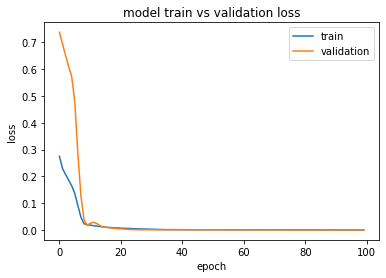

In [19]:
#Visualing model training and validation loss


plt.plot(nn.history.history['loss'])
plt.plot(nn.history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [20]:
# Making predictions
predicted = nn.predict(X2_scaled)

predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y2.reshape(-1, 1))



<AxesSubplot:title={'center':'Predicted Prices vs Actual Prices'}, xlabel='Date'>

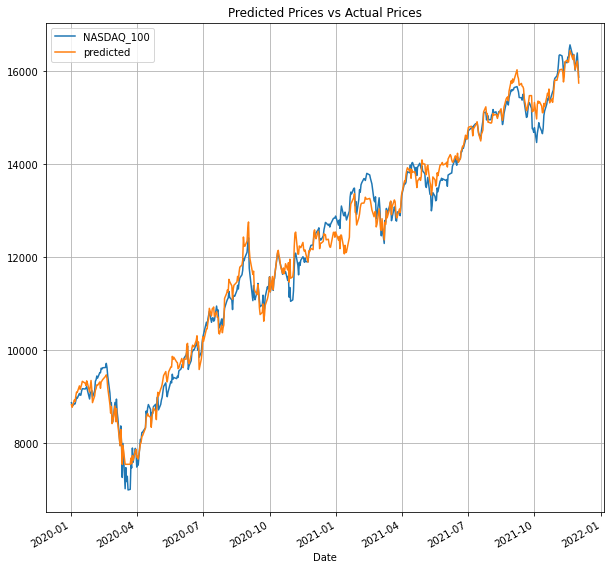

In [21]:
#Retrieving orginal prices and predicted prices

df['predicted'] = predicted_prices

a = df["NASDAQ_100"].to_frame()

b = df["predicted"].to_frame()
a = a.join(b, how="inner")


#Visualizing the data
a.plot(figsize=(10,10), title="Predicted Prices vs Actual Prices", grid=True)